In [226]:
#Assignment no 4
# simple linear regression
# Q.1 Delivery_time -> Predict delivery time using sorting time 

In [227]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [228]:
# reading a csv file using pandas library
data= pd.read_csv("D:\delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [229]:
data=data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
data




,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [230]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [231]:
data.shape

(21, 2)

In [232]:
data.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [233]:
data.tail()

,delivery_time,sorting_time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [234]:
data.dtypes

delivery_time    float64
sorting_time       int64
dtype: object

In [235]:
data.isnull().sum()

delivery_time    0
sorting_time     0
dtype: int64

<Axes: >

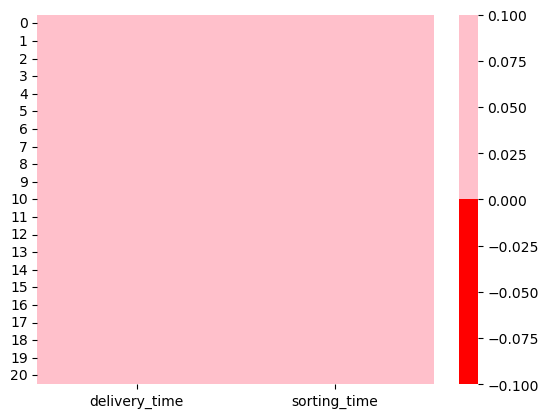

In [236]:
#to generate heat map
import seaborn as sns
cols=data.columns
colors=['red','pink']
sns.heatmap(data[cols].isnull(),cmap=sns.color_palette(colors))

In [237]:
#to check duplicate rows
data[data.duplicated()].shape

(0, 2)

In [238]:
data.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x21adf45d2d0>,
 'caps': [<matplotlib.lines.Line2D at 0x21adf45d810>,
 'boxes': [<matplotlib.lines.Line2D at 0x21adf342b00>],
 'medians': [<matplotlib.lines.Line2D at 0x21adf45dd50>],
 'fliers': [<matplotlib.lines.Line2D at 0x21adf45dff0>],
 'means': []}

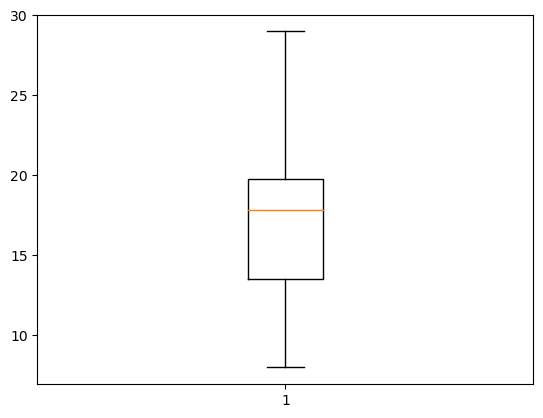

In [239]:
#outlier detection
import matplotlib.pyplot as plt
plt.boxplot(data['delivery_time'])


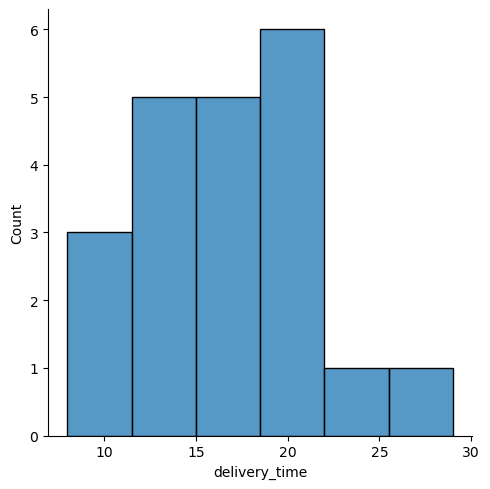

In [240]:
import seaborn as sns
sns.displot(data.delivery_time)

{'whiskers': [<matplotlib.lines.Line2D at 0x21adf45ef80>,
 'caps': [<matplotlib.lines.Line2D at 0x21adf53a290>,
 'boxes': [<matplotlib.lines.Line2D at 0x21adf4b6860>],
 'medians': [<matplotlib.lines.Line2D at 0x21adf53a7d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21adf53aa70>],
 'means': []}

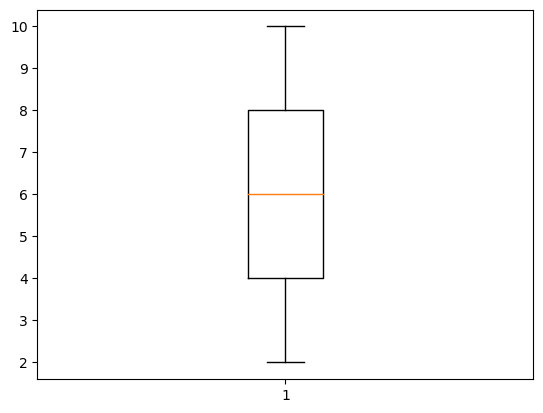

In [241]:
plt.boxplot(data['sorting_time'])

C:\Users\Tanmay Ighe\AppData\Local\Temp\ipykernel_4040\219736859.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.sorting_time)


<Axes: xlabel='sorting_time', ylabel='Density'>

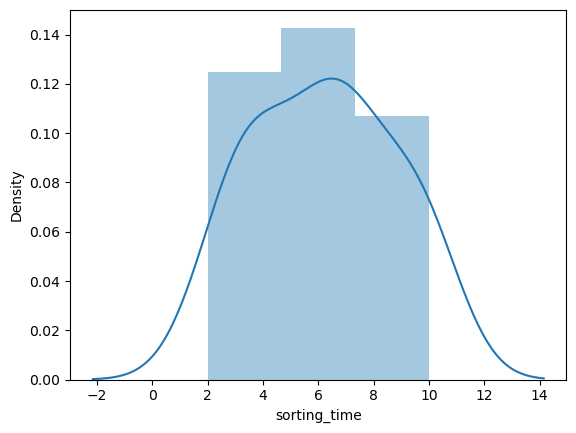

In [242]:
import seaborn as sns
sns.distplot(data.sorting_time)

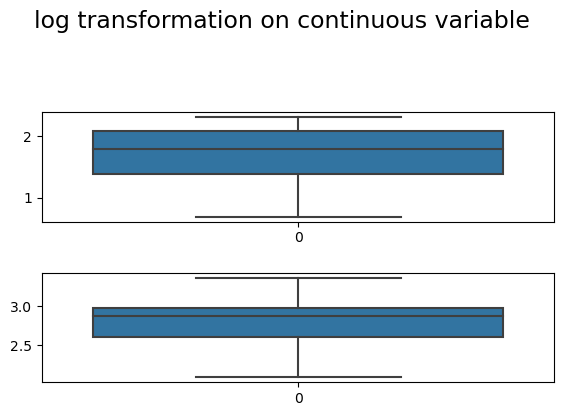

In [243]:
#performing Transformation on each column
import numpy as np
fig,ax=plt.subplots(2,figsize=(6,4),sharex= False,sharey=False)
sns.boxplot(np.log(data.sorting_time),ax=ax[0])
sns.boxplot(np.log(data.delivery_time),ax=ax[1])
plt.suptitle("log transformation on continuous variable", fontsize=17,y=1.06)
plt.tight_layout(pad=2.0)

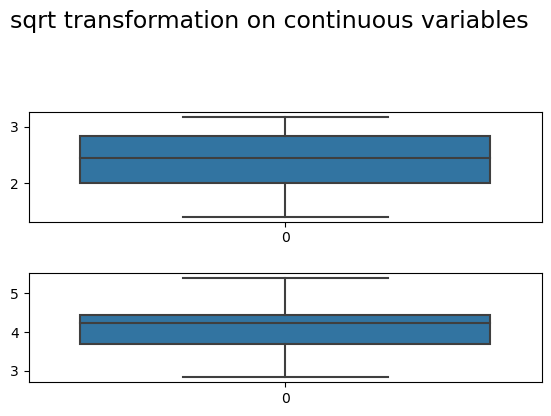

In [244]:
fig, ax=plt.subplots(2, figsize=(6,4), sharex= False, sharey = False)
sns.boxplot(np.sqrt(data.sorting_time), ax=ax[0])
sns.boxplot(np.sqrt(data.delivery_time), ax=ax[1])
plt.suptitle("sqrt transformation on continuous variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

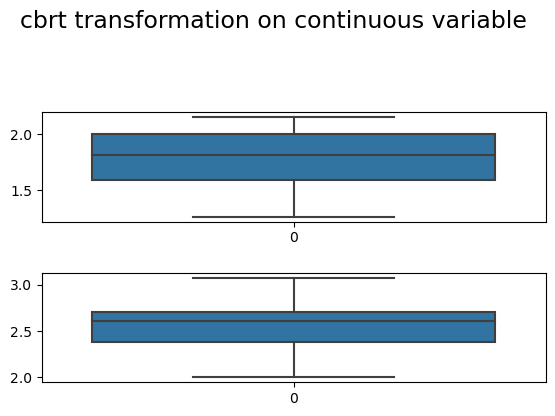

In [245]:
fig,ax=plt.subplots(2,figsize=(6,4),sharex= False,sharey=False)
sns.boxplot(np.cbrt(data.sorting_time),ax=ax[0])
sns.boxplot(np.cbrt(data.delivery_time),ax=ax[1])
plt.suptitle("cbrt transformation on continuous variable", fontsize=17,y=1.06)
plt.tight_layout(pad=2.0)

In [246]:
#correlation coef
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


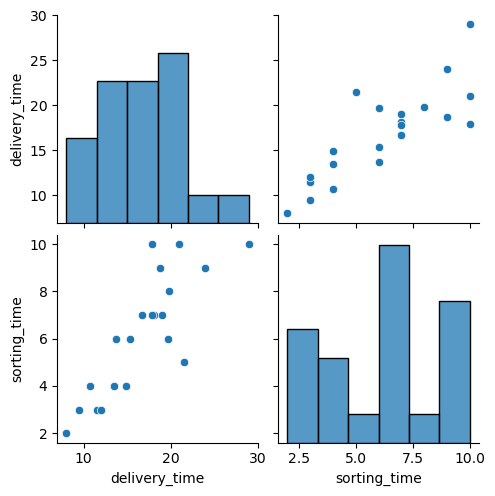

In [247]:
sns.pairplot(data)

In [248]:
import statsmodels.formula.api as smf
model=smf.ols("delivery_time~sorting_time",data=data).fit()
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [249]:
print(model.tvalues, model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [250]:
model.rsquared

0.6822714748417231

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

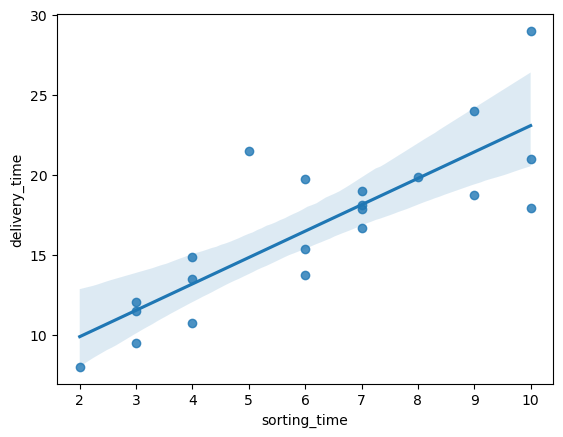

In [251]:
sns.regplot(x="sorting_time",y="delivery_time",data=data)

In [252]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           3.98e-06
Time:                        10:45:35   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

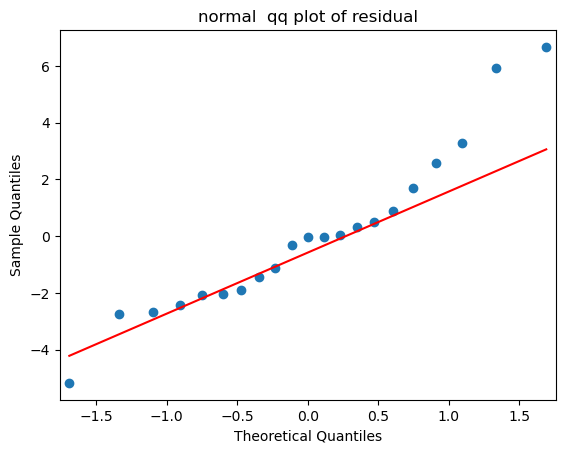

In [253]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("normal  qq plot of residual")
plt.show()

In [254]:
import numpy as np
list(np.where(model.resid>6))

[array([20], dtype=int64)]

In [255]:
#residual plot for homoscdasticity
def get_standardize_values(vals):
    return(vals-vals.mean())/vals.std()

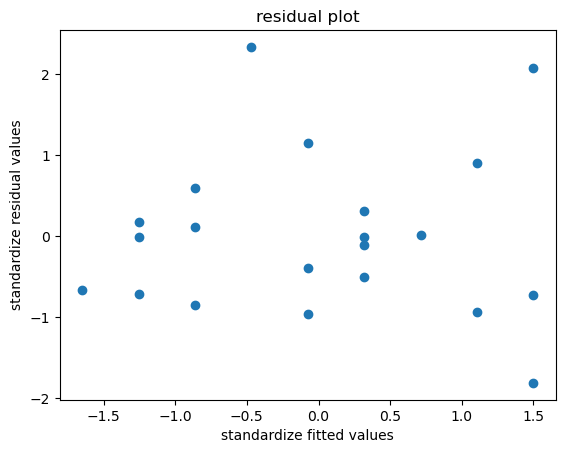

In [256]:
plt.scatter(get_standardize_values(model.fittedvalues),get_standardize_values(model.resid))
plt.ylabel("standardize residual values")
plt.xlabel("standardize fitted values")
plt.title("residual plot")
plt.show()

eval_env: 1


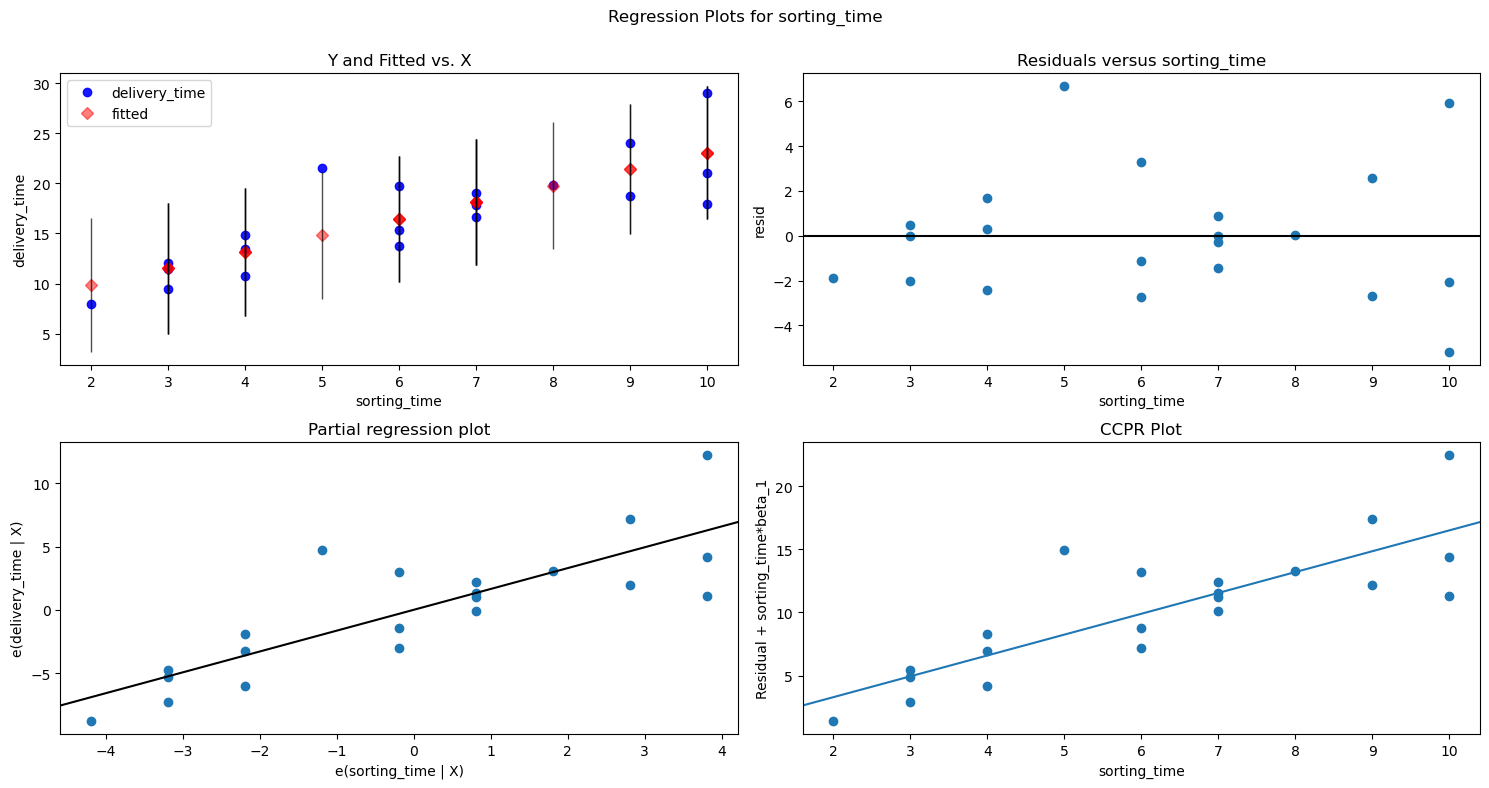

In [257]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"sorting_time",fig=fig)
plt.show()

In [258]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

<function matplotlib.pyplot.show(close=None, block=None)>

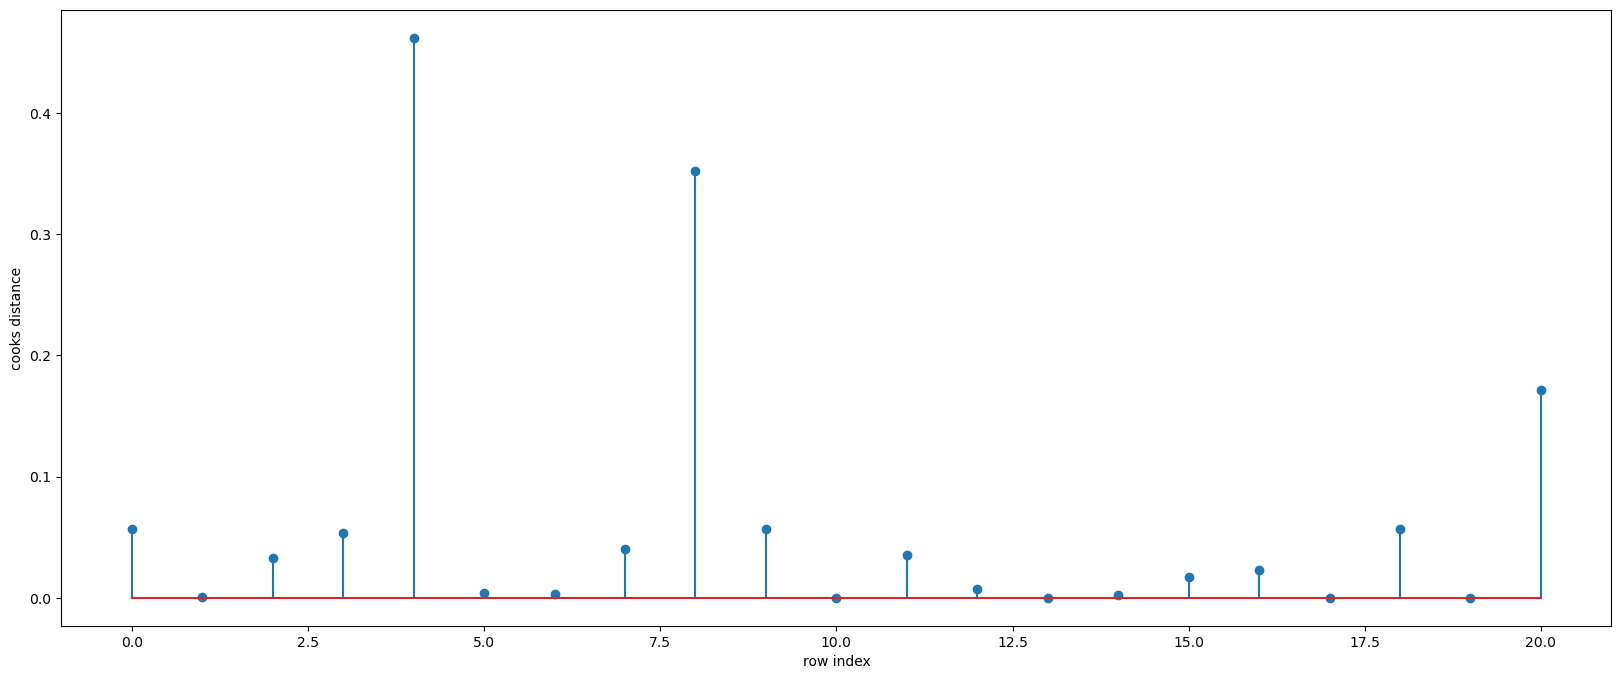

In [259]:
#plot the influencers values using stem plot
fig=plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel("row index")
plt.ylabel("cooks distance")
plt.show

In [260]:
#index and values of influencers where c is more than .5
(np.argmax(c),np.max(c))

(4, 0.4620530412650316)

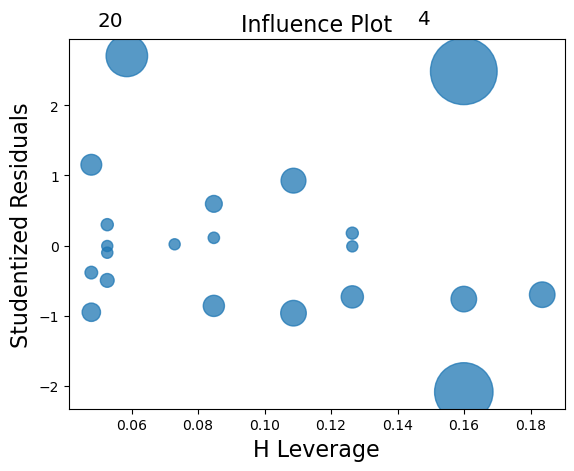

In [261]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [262]:
k=data.shape[1]
n=data.shape[0]
leverage_cutoff=3*(k+1)/n
leverage_cutoff

0.42857142857142855

In [263]:
#predict delivery time for sorting time=5,10
newdata=pd.Series([5,10])

In [264]:
data_pred=pd.DataFrame(newdata,columns=["sorting_time"])
data_pred

,sorting_time
0,5
1,10


In [265]:
model.predict(data_pred)

0    14.827833
1    23.072933
dtype: float64

In [266]:
#Q2 Salary_hike -> Build a prediction model for Salary_hike
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [267]:
dataset = pd.read_csv("D:\Salary_Data.csv")
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [268]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [269]:
dataset.shape

(30, 2)

In [270]:
dataset.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [271]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [272]:
dataset.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [273]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<Axes: >

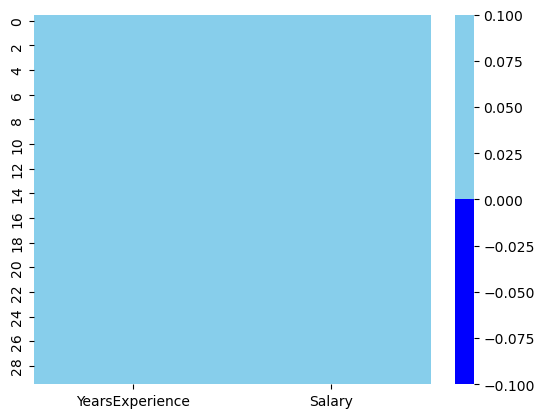

In [274]:
#to generate heat map
import seaborn as sns
cols=dataset.columns
colors=["blue","skyblue"]
sns.heatmap(dataset[cols].isnull(),cmap=sns.color_palette(colors))

In [275]:
#to check duplicate rows
dataset[dataset.duplicated()].shape

(0, 2)

In [276]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x21ae1b41750>,
 'caps': [<matplotlib.lines.Line2D at 0x21ae1b41ab0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21ae1b414b0>],
 'medians': [<matplotlib.lines.Line2D at 0x21ae1b41ff0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21ae1b42290>],
 'means': []}

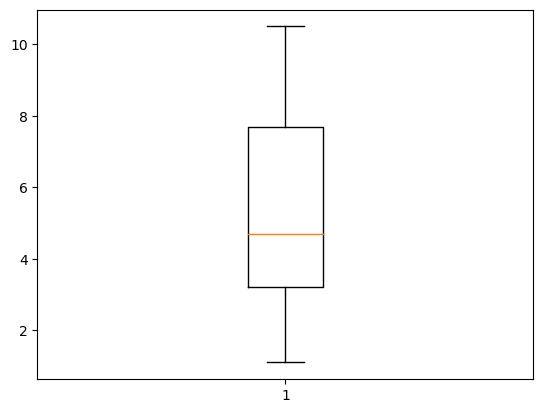

In [277]:
#outlier detection
import matplotlib.pyplot as plt
plt.boxplot(dataset['YearsExperience'])

C:\Users\Tanmay Ighe\AppData\Local\Temp\ipykernel_4040\2152630171.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.YearsExperience)


<Axes: xlabel='YearsExperience', ylabel='Density'>

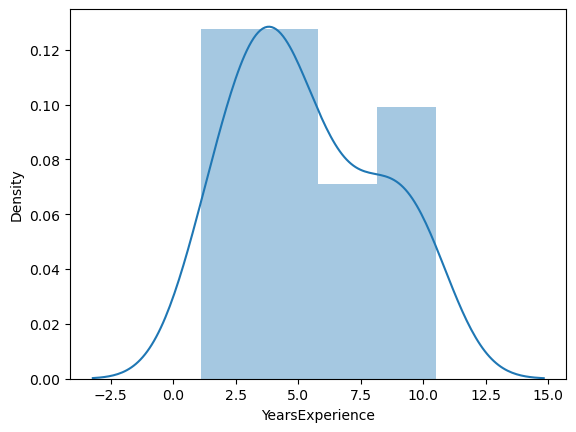

In [278]:
import seaborn as sns
sns.distplot(dataset.YearsExperience)

{'whiskers': [<matplotlib.lines.Line2D at 0x21ae2beb610>,
 'caps': [<matplotlib.lines.Line2D at 0x21ae2beba30>,
 'boxes': [<matplotlib.lines.Line2D at 0x21ae2beb310>],
 'medians': [<matplotlib.lines.Line2D at 0x21ae2bebf70>],
 'fliers': [<matplotlib.lines.Line2D at 0x21ae2c24250>],
 'means': []}

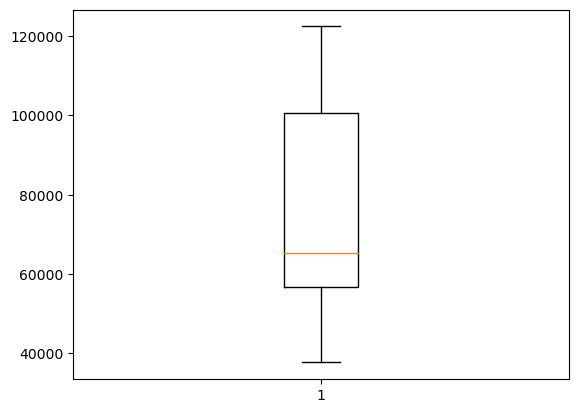

In [279]:
import matplotlib.pyplot as plt
plt.boxplot(dataset['Salary'])

C:\Users\Tanmay Ighe\AppData\Local\Temp\ipykernel_4040\30852538.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.Salary)


<Axes: xlabel='Salary', ylabel='Density'>

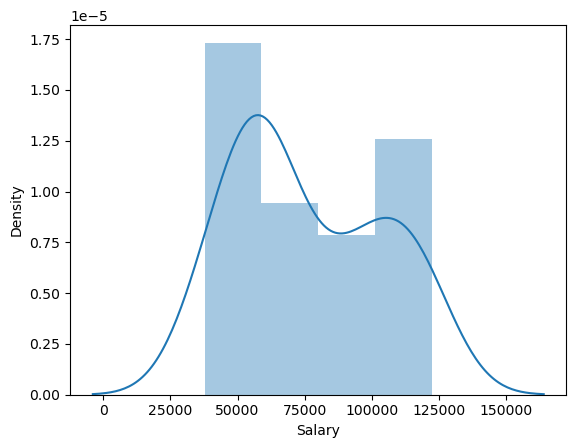

In [280]:
import seaborn as sns
sns.distplot(dataset.Salary)

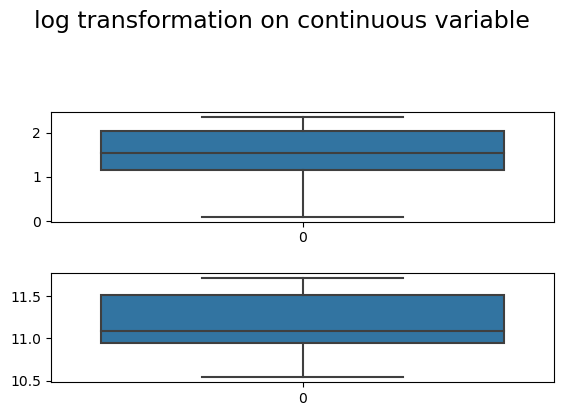

In [281]:
#performing Transformation on each column
import numpy as np
fig,ax=plt.subplots(2,figsize=(6,4),sharex= False,sharey=False)
sns.boxplot(np.log(dataset.YearsExperience),ax=ax[0])
sns.boxplot(np.log(dataset.Salary),ax=ax[1])
plt.suptitle("log transformation on continuous variable", fontsize=17,y=1.06)
plt.tight_layout(pad=2.0)

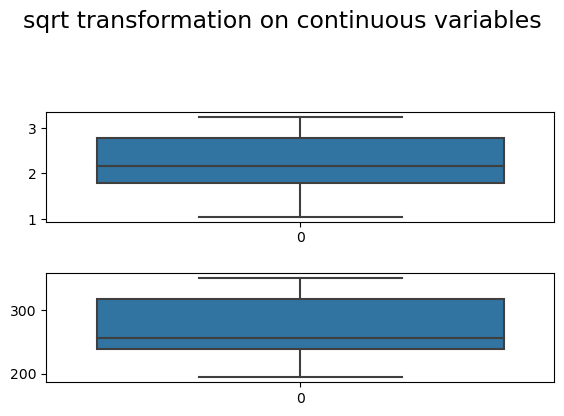

In [282]:
fig, ax=plt.subplots(2, figsize=(6,4), sharex= False, sharey = False)
sns.boxplot(np.sqrt(dataset.YearsExperience), ax=ax[0])
sns.boxplot(np.sqrt(dataset.Salary), ax=ax[1])
plt.suptitle("sqrt transformation on continuous variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

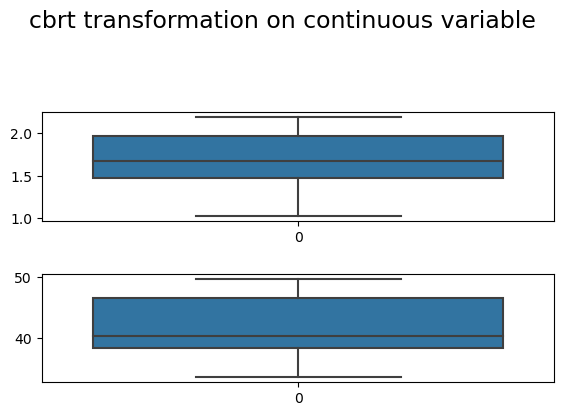

In [283]:
fig,ax=plt.subplots(2,figsize=(6,4),sharex= False,sharey=False)
sns.boxplot(np.cbrt(dataset.YearsExperience),ax=ax[0])
sns.boxplot(np.cbrt(dataset.Salary),ax=ax[1])
plt.suptitle("cbrt transformation on continuous variable", fontsize=17,y=1.06)
plt.tight_layout(pad=2.0)

In [284]:
#correlation coef
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


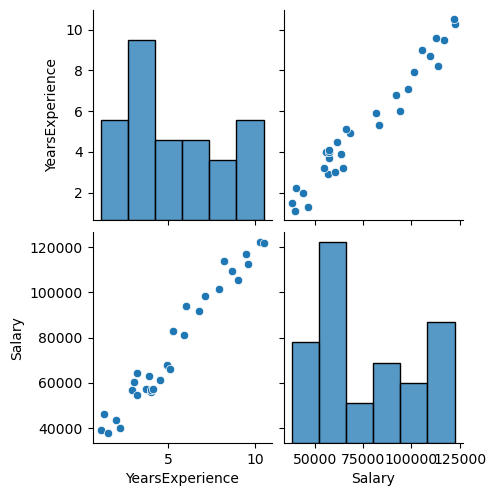

In [285]:
sns.pairplot(dataset)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

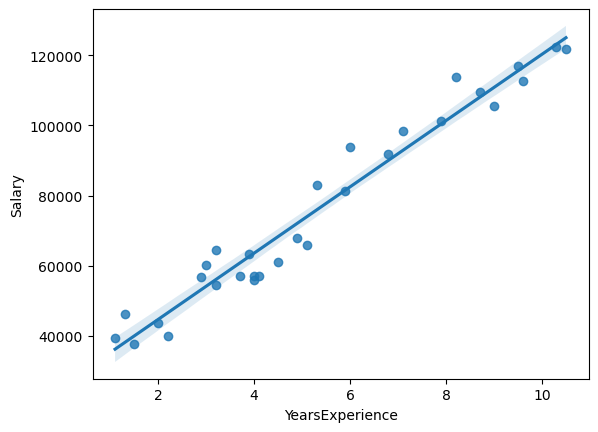

In [286]:
sns.regplot(x=dataset["YearsExperience"],y=dataset["Salary"])


In [287]:
model=smf.ols("Salary~YearsExperience",data=dataset).fit()
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [288]:
model.tvalues,model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [289]:
model.rsquared

0.9569566641435086

In [290]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           1.14e-20
Time:                        10:46:21   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

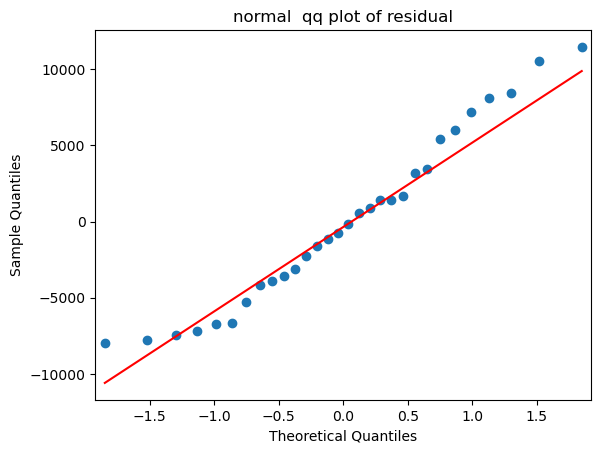

In [291]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("normal  qq plot of residual")
plt.show()

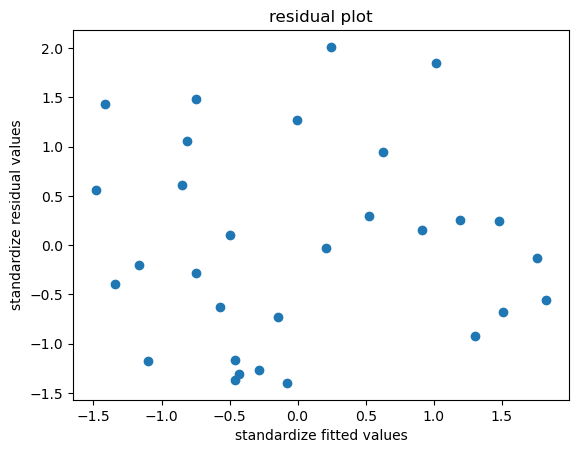

In [292]:
def get_standardize_values(vals):
    return(vals-vals.mean())/vals.std()
plt.scatter(get_standardize_values(model.fittedvalues),get_standardize_values(model.resid))
plt.ylabel("standardize residual values")
plt.xlabel("standardize fitted values")
plt.title("residual plot")
plt.show()

eval_env: 1


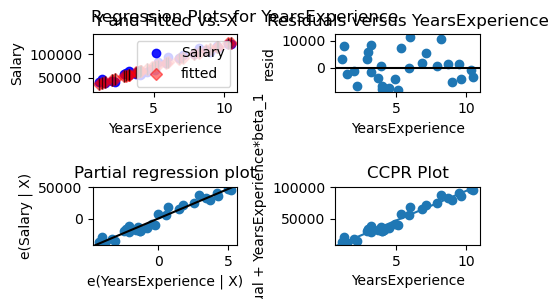

In [293]:
fig=plt.figure(figsize=(5,3))
fig=sm.graphics.plot_regress_exog(model,"YearsExperience",fig=fig)
plt.show()

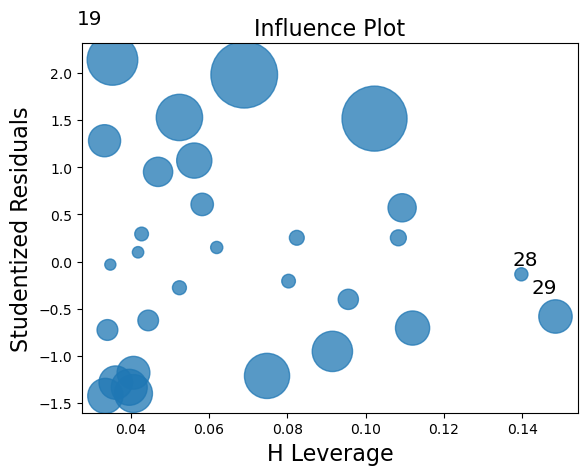

In [294]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [295]:
#model prediction for say 3 years of experience
Salary=(25792.200199)+(9449.962321)*(3)
Salary

54142.087162

In [296]:
#Automatic prediction for 3 & 5 YearsExperience
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [297]:
data_pred=pd.DataFrame(new_data,columns=["YearsExperience"])
data_pred

,YearsExperience
0,3
1,5


In [298]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64